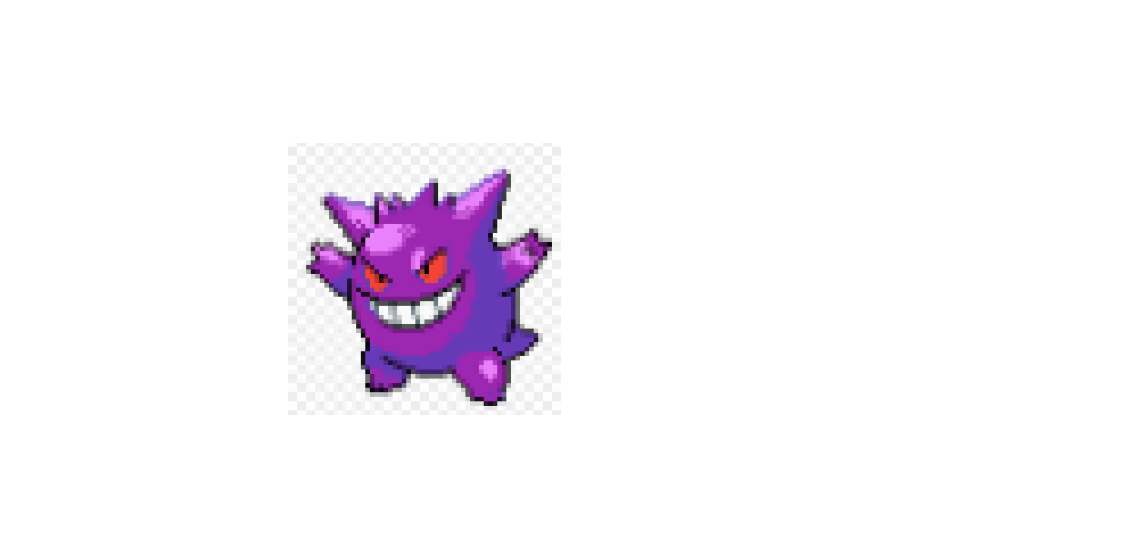

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pixelate_rgb(img, window):
    n, m, _ = img.shape
    n, m = n - n % window, m - m % window
    img1 = np.zeros((n, m, 3))
    for x in range(0, n, window):
        for y in range(0, m, window):
            img1[x:x+window,y:y+window] = img[x:x+window,y:y+window].mean(axis=(0,1))
    return img1

img = plt.imread('test3.png')

fig, ax = plt.subplots(1, 4, figsize=(20,10))

ax[1].imshow(pixelate_rgb(img, 5))

# remove frames
[a.set_axis_off() for a in ax.flatten()]
plt.subplots_adjust(wspace=0.03, hspace=0)

In [2]:
from PIL import Image
import os
import PIL
import glob

image = Image.open("test3.png")
image = image.resize((48, 48), Image.ANTIALIAS)  # LANCZOS as of Pillow 2.7
quality_val = 100
image.thumbnail((48,48))
image.save("resized"+".jpeg", 'JPEG', quality=100)

In [3]:
im = Image.open('resized.jpeg')
pixels = list(im.getdata())

In [4]:
from math import sqrt

COLORS = (
    (0, 0, 0),
    (127, 127, 127),
    (136, 0, 21),
    (237, 28, 36),
    (255, 127, 39),
    (255, 242, 0),
    (34, 177, 76),
    (203, 228, 253),
    (0, 162, 232),
    (63, 72, 204),
    (255, 255, 255),
    (195, 195, 195),
    (185, 122, 87),
    (255, 174, 201),
    (255, 201, 14),
    (239, 228, 176),
    (181, 230, 29),
    (153, 217, 234),
    (112, 146, 190),
    (200, 191, 231)
)

color_counts = {
(0, 0, 0) : ["Black", 0],
(127, 127, 127): ["Gray", 0],
(136, 0, 21): ["Bordeaux", 0],
(237, 28, 36): ["red", 0],
(255, 127, 39): ["orange", 0],
(255, 242, 0): ["yellow", 0],
(34, 177, 76): ["green", 0],
(203, 228, 253): ["blue", 0],
(0, 162, 232): ["dark blue", 0],
(63, 72, 204): ["purple", 0],
(255, 255, 255): ["white", 0],
(195, 195, 195): ["light gray", 0],
(185, 122, 87): ["light brown", 0],
(255, 174, 201): ["light pink", 0],
(255, 201, 14): ["dark yellow", 0],
(239, 228, 176): ["light yellow", 0],
(181, 230, 29): ["light green", 0],
(153, 217, 234): ["light blue", 0],
(112, 146, 190): ["dark blue", 0],
(200, 191, 231): ["light purple", 0]
}

def closest_color(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

outbyname = []
newrgbs = []

for pixel in pixels:
    rgb = closest_color(pixel)
    color = color_counts[rgb]
    color_counts[rgb][1] += 1
    
    colorlist = []
    colorlist.append(color[0])
    outbyname.append(colorlist)
    
    newrgbs.append(rgb)
    
# => (0, 162, 232) - Dark Blue
# for item in color_counts:
#     print(color_counts[item])
# for item in newout:
#     print(item)

picMatrix = []

i = 0
while(i < len(newrgbs)):
    temp = []
    while len(temp) < 48:
        temp.append(newrgbs[i])
        i+=1
    picMatrix.append(temp)
    temp = []

In [5]:
from PIL import Image
import numpy as np

avatar_array = np.array(picMatrix, dtype=np.uint8)
avatar_image = Image.fromarray(avatar_array)
avatar_image = avatar_image.resize((480, 480), resample=Image.NEAREST)
avatar_image.save("avatar.png")